# Programming for Data Analysis Project 2020

## Problem Statement

- Choose a real-world phenomenon that can be measured and for which you could
collect at least one-hundred data points across at least four different variables.

- Investigate the types of variables involved, their likely distributions, and their relationships with each other.

- Synthesise/simulate a data set as closely matching their properties as possible.

- Detail your research and implement the simulation in a Jupyter notebook – the
data set itself can simply be displayed in an output cell within the notebook.


### Project Outline

Subject Matter - Road Collisions for a given year. For this project we will use 2018. To create a dataset, intial variables are:
1. Collision type
2. Month
3. Day
4. Date
5. Month
6. Time Band
7. Sex
8. Age
9. Road User.
10. County (maybe)

In 2018 there was 8150 fatal and serious casulaties so this will be our sample size for the intial dataset. Once this is complete another summary dataset can be created summarised by date. In this table we may add, Speeding fines, traffic volumes - km driven for further analyitical purposes.

### Project Plan

#### 1. Gathering research data
* Gather data from CSO datasets and RSA datsets for collisions by:
  - Month
  - Day
  - Time Band
  - Road User (cover Sex and Age)

* Traffic data from the annual Transport Omnibus 

* Fixed Charged Notices from Garda.ie for
  - Speeding
  - Intoxication
  - Mobile Phones
  
Initial formatting of csv files in order to create Pandas dataframes

#### 2. EDA (Research) of these datasets
* To understand required distributions, averages etc. to create out dataset
  - 5 years of data for percentage breakdowns, averages and weighted averages not for overall figures.

#### 3. Variables and Functions
* Create relevant variables and functions to be used for simulated dataset
  - p values
  - weighted averages
  - lists
  - dictionaries
  
#### 4. Create intial dataset
* creation of categorical based dataset that summary will be based on.
  - Create dates based on monthly and daily p values and distribution
  - dates will automatically created day and month
  - Monthly collisions by type (conditional binomial by month depending on EDA)
  - Time band - might be by month depending on initial EDA
  - Road User - might be by month depending on initial EDA
  - Sex (conditional binomial by month depending on EDA)

#### 5. Summary datset
* summarise intial dataset by data
* add in traffic and fcns

#### 6. EDA of the summary Dataset.
* summarise by each variable
* pairplot for collisons, fcns, traffic





### Python Libaries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

rng = np.random.default_rng()

## Road Collisions on Irish Roads



### Distribution by Day

Using the research data based on the collsions by month for 2018, we will distribute across our dataset based on % breakdown for each month. This will form the count of days in each month where we will apply date based on further research of the collsions by weekday

In [20]:
#import collisions by month data
by_month_df = pd.read_csv('https://raw.githubusercontent.com/conor1982/PfDA_Project/main/Source_data/by_Month.csv')

In [21]:
#creating a total columns by adding all columns together
by_month_df['Total'] = by_month_df['2014'] + by_month_df['2015'] +by_month_df['2016'] +by_month_df['2017'] +by_month_df['2018']
by_month_df

,Month,Type,2014,2015,2016,2017,2018,Total
0,January,Fatalities,16,12,15,16,12,71
1,February,Fatalities,13,13,10,11,10,57
2,March,Fatalities,15,11,17,20,14,77
3,April,Fatalities,14,7,14,7,17,59
4,May,Fatalities,18,12,20,8,4,62
5,June,Fatalities,18,13,12,14,16,73
6,July,Fatalities,18,19,21,16,8,82
7,August,Fatalities,15,14,13,10,12,64
8,September,Fatalities,11,16,18,13,10,68
9,October,Fatalities,17,11,20,11,9,68


#### List of days for sorting outputs

In [22]:
#list of months to produce an output descending in month order of list
#ref https://stackoverflow.com/questions/48042915/sort-a-pandass-dataframe-series-by-month-name
months = ['January', 'February', 'March', 'April', 'May', 'June','July','August','September','October','November','December']

#### % Breakdown by Month of Collisions

In [23]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Normalised_2018_Collisions = (Monthly_2018_Collisions/Total_2018_Collisions).to_frame('%').reset_index()

#applying an order by month
Normalised_2018_Collisions['Month'] = pd.Categorical(Normalised_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Normalised_2018_Collisions  = Normalised_2018_Collisions.sort_values(['Month'])
Normalised_2018_Collisions


,Month,%
4,January,0.074847
3,February,0.071779
7,March,0.074724
0,April,0.075951
8,May,0.090429
6,June,0.088589
5,July,0.090552
1,August,0.079264
11,September,0.085276
10,October,0.089816


#### Breakdown by Monthly Totals

In [24]:
#Dataframe of just 2018 Collisions grouped by Month
Monthly_2018_Collisions = by_month_df.groupby('Month')['2018'].sum()

#Total of all months
Total_2018_Collisions = sum(by_month_df.groupby('Month')['2018'].sum())

#creating % breakdown by month
Total_Monthly_2018_Collisions = (Monthly_2018_Collisions).to_frame('Total').reset_index()

#applying an order by month
Total_Monthly_2018_Collisions['Month'] = pd.Categorical(Total_Monthly_2018_Collisions['Month'],categories=months, ordered=True)

#sorted by month
Total_Monthly_2018_Collisions  = Total_Monthly_2018_Collisions.sort_values(['Month'])
Total_Monthly_2018_Collisions

,Month,Total
4,January,610
3,February,585
7,March,609
0,April,619
8,May,737
6,June,722
5,July,738
1,August,646
11,September,695
10,October,732


#### Identifying P values

In [25]:
#p-values to be used in function to create number of dates in each month
month_p_values = np.array(Normalised_2018_Collisions['%'])
month_p_values

array([0.07484663, 0.07177914, 0.07472393, 0.07595092, 0.09042945,
       0.08858896, 0.09055215, 0.0792638 , 0.08527607, 0.08981595,
       0.09042945, 0.08834356])

#### Applying P values to np.random.choice function creating 8150 datapoints

In [26]:
#size of dataset 8150, 2018 had 8150 collisions so we will use this figure

dataset_size = 8150

df = pd.DataFrame(rng.choice(months,dataset_size,p=(month_p_values)),columns=['Month'])
df['Month'] = pd.Categorical(df['Month'],categories=months, ordered=True)
df = df.sort_values(['Month'])
df

,Month
6947,January
3600,January
1160,January
7094,January
1174,January
...,...
1880,December
6442,December
1886,December
1869,December


#### Comparison of Actual v Simulate Data

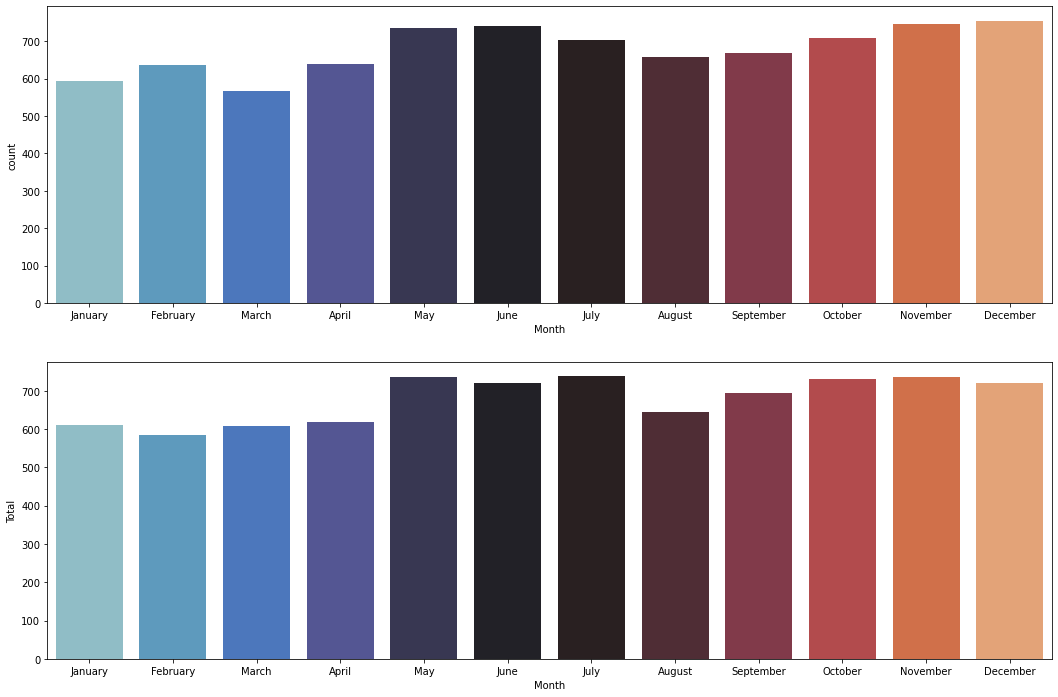

In [27]:
plt.figure(figsize=(18,12))

plt.subplot(2,1,1)
sns.countplot(x='Month',data=df,palette='icefire')

plt.subplot(2,1,2)
sns.barplot(x='Month',y='Total',data=Total_Monthly_2018_Collisions,ci=None,palette='icefire');

In [30]:
def size(m):
    size = len(df[df['Month']==m])
    return size

In [33]:
size('January')
size('February')
size('March')
size('April')
size('May')
size('June')
size('July')
size('August')
size('September')
size('October')
size('Novemeber')
size('December')

755